In [2]:
%cd ~/Desktop/repos/analisi_dati/final-task/
%load_ext autoreload
%autoreload 2

/Users/lucaarnaboldi/Desktop/repos/analisi_dati/final-task


In [3]:
from sklearn.svm import SVC

from metrics import *

[13  1]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [6]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

model_optimizer = RandomizedSearchCV(
    SVC(kernel='rbf'),
    {'C': loguniform(1, 1000), 'kernel':['linear','rbf','sigmoid']},
    n_iter= 45,
    cv=3,
    verbose=3,
    scoring=CVscoring,
    # n_jobs=5
  )
model_optimizer.fit(cX_train[1000], ccY_train[1000])
print(model_optimizer.best_params_)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV 1/3] END .C=3.40753956327176, kernel=linear;, score=1.341 total time=   7.3s
[CV 2/3] END .C=3.40753956327176, kernel=linear;, score=1.327 total time=   7.0s
[CV 3/3] END .C=3.40753956327176, kernel=linear;, score=1.354 total time=   7.1s
[CV 1/3] END ...C=474.9920003432144, kernel=rbf;, score=1.653 total time=  14.9s
[CV 2/3] END ...C=474.9920003432144, kernel=rbf;, score=1.590 total time=  13.3s
[CV 3/3] END ...C=474.9920003432144, kernel=rbf;, score=1.600 total time=  13.1s
[CV 1/3] END C=10.452562396644712, kernel=linear;, score=1.387 total time=   6.1s
[CV 2/3] END C=10.452562396644712, kernel=linear;, score=1.376 total time=   6.0s
[CV 3/3] END C=10.452562396644712, kernel=linear;, score=1.401 total time=   6.5s
[CV 1/3] END .C=369.666282690447, kernel=linear;, score=1.453 total time=  18.7s
[CV 2/3] END .C=369.666282690447, kernel=linear;, score=1.413 total time=  18.2s
[CV 3/3] END .C=369.666282690447, kernel=lin

(0.7312963829644983, 0.7489758688965857, 0.5920517194396269, 0.632220668247701)

(0.7953132312629538, 0.7702301259836815, 0.6920782385137397, 0.7202794933603597)


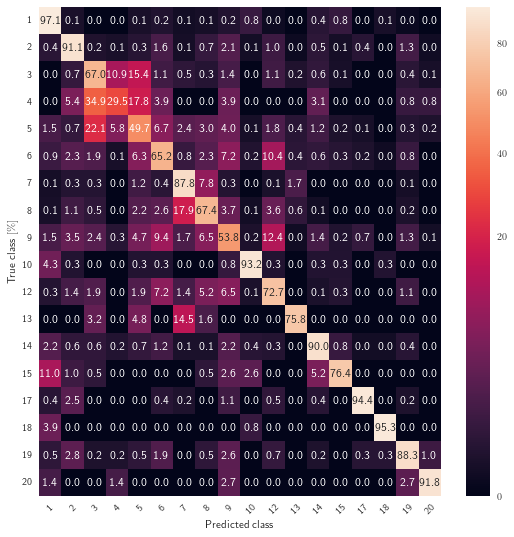

In [3]:
optimal_svc = SVC(C=152.4, kernel='rbf')
optimal_svc.fit(cX_train[5000], ccY_train[5000])
pY = optimal_svc.predict(X_valid)

print(evaluate_model(cY_valid, pY))
plot_confusion_matrix(cY_valid, pY, 'figures/svc/generic-best.pdf', show=True)

#### Fourier Transform

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

model_optimizer = RandomizedSearchCV(
    SVC(),
    {'C': loguniform(1, 1000), 'kernel':['linear','rbf','sigmoid']},
    n_iter= 45,
    cv=3,
    verbose=3,
    scoring=CVscoring,
    # n_jobs=5
  )
model_optimizer.fit(cX_train_ft[2000], ccY_train[2000])
print(model_optimizer.best_params_)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV 1/3] END .C=43.4012260744201, kernel=linear;, score=1.095 total time= 2.3min
[CV 2/3] END .C=43.4012260744201, kernel=linear;, score=1.113 total time= 2.4min
[CV 3/3] END .C=43.4012260744201, kernel=linear;, score=1.118 total time= 2.5min
[CV 1/3] END C=39.302668130933725, kernel=linear;, score=1.093 total time= 2.1min
[CV 2/3] END C=39.302668130933725, kernel=linear;, score=1.113 total time= 2.2min
[CV 3/3] END C=39.302668130933725, kernel=linear;, score=1.118 total time= 2.3min
[CV 1/3] END ...C=9.676014982814344, kernel=rbf;, score=1.013 total time=  46.3s
[CV 2/3] END ...C=9.676014982814344, kernel=rbf;, score=1.028 total time=  48.2s
[CV 3/3] END ...C=9.676014982814344, kernel=rbf;, score=1.057 total time=  47.3s
[CV 1/3] END C=611.905494879685, kernel=sigmoid;, score=0.013 total time=  49.5s
[CV 2/3] END C=611.905494879685, kernel=sigmoid;, score=0.017 total time=  49.7s
[CV 3/3] END C=611.905494879685, kernel=sigm

RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=45,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x126c34c10>,
                                        'kernel': ['linear', 'rbf', 'sigmoid']},
                   scoring=make_scorer(score_model), verbose=3)

In [4]:
fft_optimal_svc = SVC(C=221., kernel='rbf')
fft_optimal_svc.fit(cX_train_ft[5000], ccY_train[5000])

ValueError: X has 46 features, but SVC is expecting 24 features as input.

(0.5724409975262419, 0.6194477057032347, 0.4202510777691677, 0.4436217146308014)


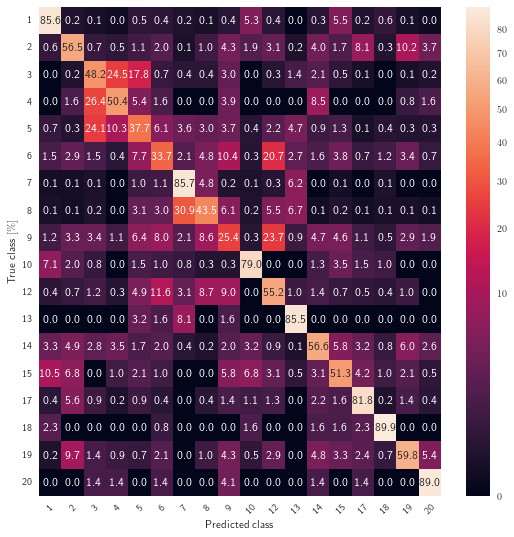

In [5]:
pY = fft_optimal_svc.predict(X_valid_ft)

print(evaluate_model(cY_valid, pY))
plot_confusion_matrix(cY_valid, pY, 'figures/svc/fourier-best.pdf', show=True)